Colab link：https://colab.research.google.com/drive/1jA299VneOMy8AkpD2qvSWFrnq4E_GU6h?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import ttest_ind 
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.stats.power as smp
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

# 1. View basic data information

In [ ]:
# Import the dataset
arrest_data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001)(3).csv")
arrest_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0


In [ ]:
arrest_data.shape

(62016, 25)

In [ ]:
arrest_data.info()# Some fields in the data have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62016 entries, 0 to 62015
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      62016 non-null  int64  
 1   Arrest_Month                     62016 non-null  object 
 2   EventID                          62016 non-null  int64  
 3   ArrestID                         61547 non-null  float64
 4   PersonID                         62016 non-null  int64  
 5   Perceived_Race                   62013 non-null  object 
 6   Sex                              62016 non-null  object 
 7   Age_group__at_arrest_            61994 non-null  object 
 8   Youth_at_arrest__under_18_years  62016 non-null  object 
 9   ArrestLocDiv                     62016 non-null  object 
 10  StripSearch                      62016 non-null  int64  
 11  Booked                           62016 non-null  int64  
 12  Occurrence_Categor

## 2. Data visualization

### Subplots

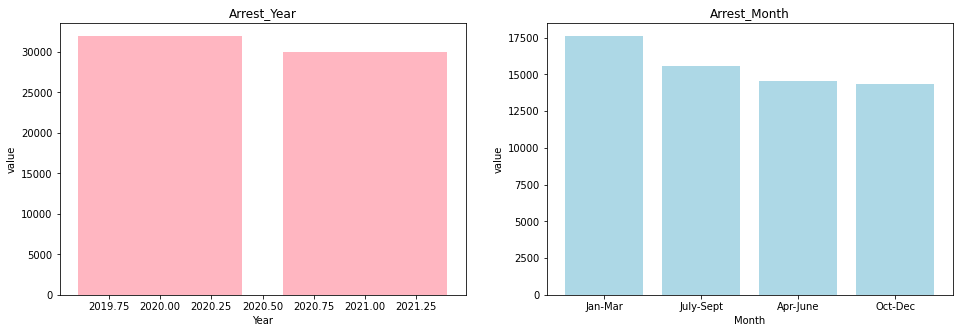

In [ ]:
a_year = pd.DataFrame(arrest_data['Arrest_Year'].value_counts())
a_month = pd.DataFrame(arrest_data['Arrest_Month'].value_counts())
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].bar(a_year.index, a_year['Arrest_Year'].values,color='lightpink')
axs[0].set_title('Arrest_Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('value')
axs[1].bar(a_month.index, a_month['Arrest_Month'],color='lightblue')
axs[1].set_title('Arrest_Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('value')
plt.savefig('figure1.jpg')
plt.show();

### pie chart

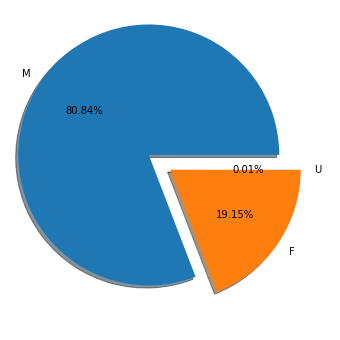

In [ ]:
plt.figure(figsize=(8, 6))
a_sex = pd.DataFrame(arrest_data['Sex'].value_counts())
labels =a_sex.index
data = a_sex['Sex'].values 
explode = [0.2, 0, 0] 
plt.pie(data, labels= labels, autopct='%0.2f%%',explode= explode,shadow=True)
plt.savefig('figure2.pdf')

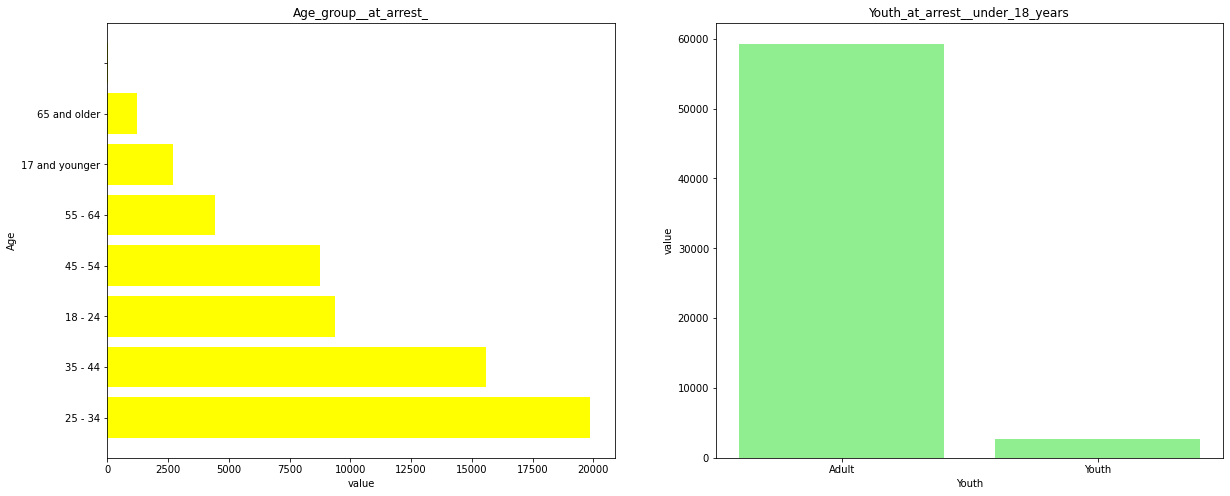

In [ ]:
arrest_data['Age'] = np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 17 years and under', '17 and younger',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 17 years and younger', '17 and younger',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 18 to 24 years', '18 - 24',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 25 to 34 years', '25 - 34',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 35 to 44 years', '35 - 44',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 45 to 54 years', '45 - 54',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 55 to 64 years', '55 - 64',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 65 and older', '65 and older',
         np.where(arrest_data['Age_group__at_arrest_'] == 'Aged 65 years and older', '65 and older','')))))))))
a_age = pd.DataFrame(arrest_data['Age'].value_counts())

arrest_data['youth'] = np.where(arrest_data['Youth_at_arrest__under_18_years'] == 'Not a youth', 'Adult',
        np.where(arrest_data['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 and younger)', 'Youth',
        np.where(arrest_data['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 years and under)', 'Youth','')))
a_youth = pd.DataFrame(arrest_data['youth'].value_counts())

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].barh(a_age.index, a_age['Age'].values,color='yellow')
axs[0].set_title('Age_group__at_arrest_')
axs[0].set_xlabel('value')
axs[0].set_ylabel('Age')
axs[1].bar(a_youth.index, a_youth['youth'],color='lightgreen')
axs[1].set_title('Youth_at_arrest__under_18_years')
axs[1].set_xlabel('Youth')
axs[1].set_ylabel('value')
plt.savefig('figure3.pdf')
plt.show();

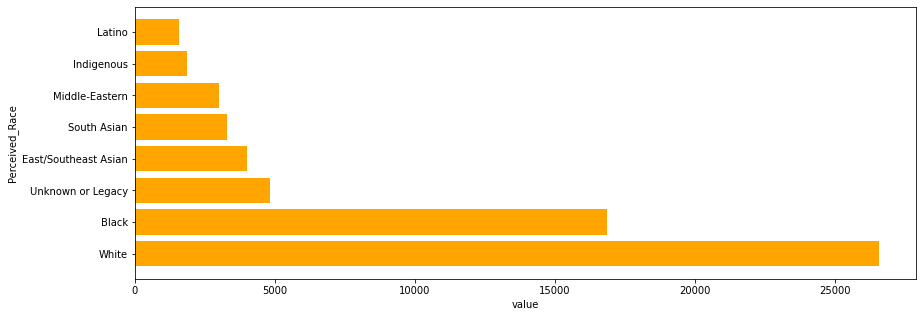

In [ ]:
plt.figure(figsize=(14, 5))
a_race = pd.DataFrame(arrest_data['Perceived_Race'].value_counts())
plt.barh(a_race.index, a_race['Perceived_Race'].values,color='orange')
plt.xlabel('value')
plt.ylabel('Perceived_Race')
plt.savefig('figure4.pdf')
plt.show();

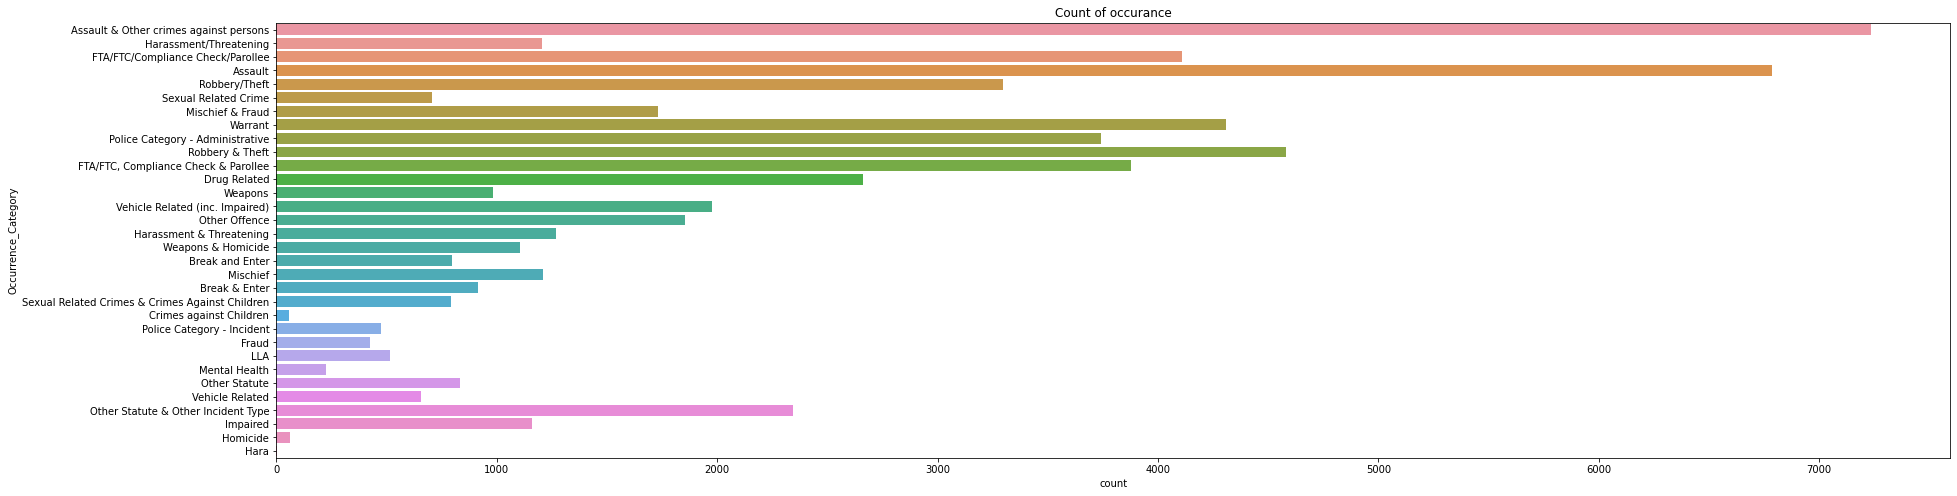

In [ ]:
# Check the distribution of Occurrence_Category 
plt.figure(figsize=(30, 8))
sns.countplot(y="Occurrence_Category", data = arrest_data, orient='h')
plt.title("Count of occurance")
plt.savefig('figure5.pdf')
plt.show();

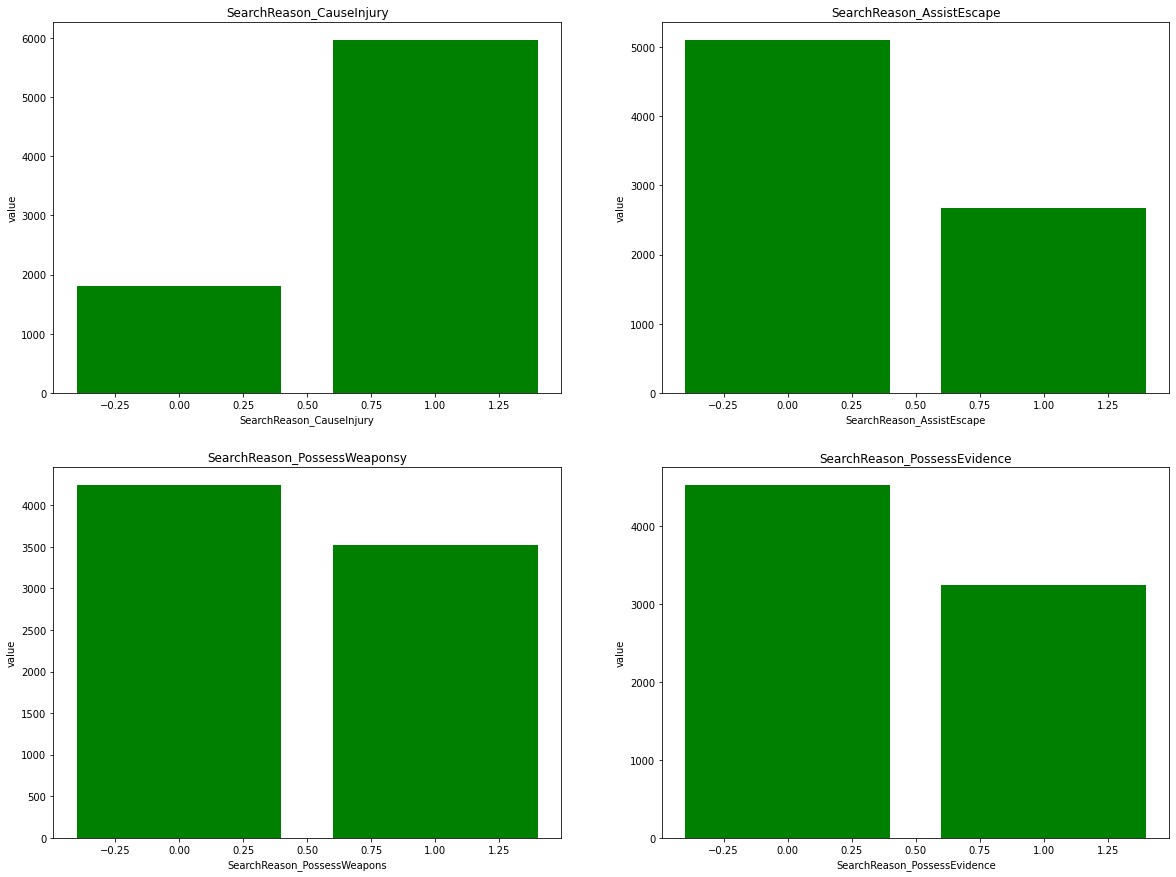

In [ ]:
a_cauesinjury = pd.DataFrame(arrest_data['SearchReason_CauseInjury'].value_counts())
a_SearchReason_AssistEscape = pd.DataFrame(arrest_data['SearchReason_AssistEscape'].value_counts())
a_SearchReason_PossessWeapons = pd.DataFrame(arrest_data['SearchReason_PossessWeapons'].value_counts())
a_SearchReason_PossessEvidence = pd.DataFrame(arrest_data['SearchReason_PossessEvidence'].value_counts())

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs[0][0].bar(a_cauesinjury.index, a_cauesinjury['SearchReason_CauseInjury'].values,color='green')
axs[0][0].set_title('SearchReason_CauseInjury')
axs[0][0].set_xlabel('SearchReason_CauseInjury')
axs[0][0].set_ylabel('value')

axs[0][1].bar(a_SearchReason_AssistEscape.index, a_SearchReason_AssistEscape['SearchReason_AssistEscape'].values,color='green')
axs[0][1].set_title('SearchReason_AssistEscape')
axs[0][1].set_xlabel('SearchReason_AssistEscape')
axs[0][1].set_ylabel('value')

axs[1][0].bar(a_SearchReason_PossessWeapons.index, a_SearchReason_PossessWeapons['SearchReason_PossessWeapons'].values,color='green')
axs[1][0].set_title('SearchReason_PossessWeaponsy')
axs[1][0].set_xlabel('SearchReason_PossessWeapons')
axs[1][0].set_ylabel('value')

axs[1][1].bar(a_SearchReason_PossessEvidence.index, a_SearchReason_PossessEvidence['SearchReason_PossessEvidence'].values,color='green')
axs[1][1].set_title('SearchReason_PossessEvidence')
axs[1][1].set_xlabel('SearchReason_PossessEvidence')
axs[1][1].set_ylabel('value')
plt.savefig('figure6.pdf')
plt.show();

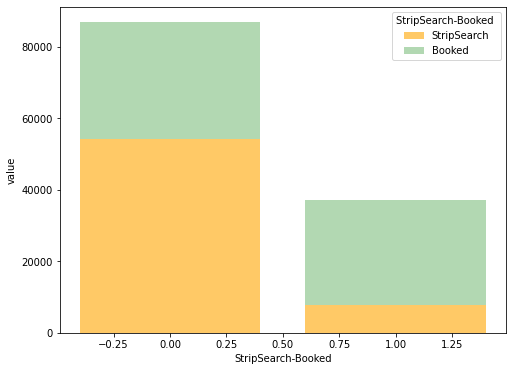

In [ ]:
a_StripSearch = pd.DataFrame(arrest_data['StripSearch'].value_counts())
a_Booked = pd.DataFrame(arrest_data['Booked'].value_counts())
x=[0,1]
plt.figure(figsize=(8, 6))
plt.bar(x, a_StripSearch['StripSearch'].values,color='orange',alpha=0.6,label='StripSearch')
plt.bar(x, a_Booked['Booked'].values,color='green',alpha=0.3,bottom=a_StripSearch['StripSearch'].values,label='Booked')
plt.xlabel('StripSearch-Booked')
plt.ylabel('value')
plt.legend(title='StripSearch-Booked ')
plt.savefig('figure7.pdf')
plt.show();

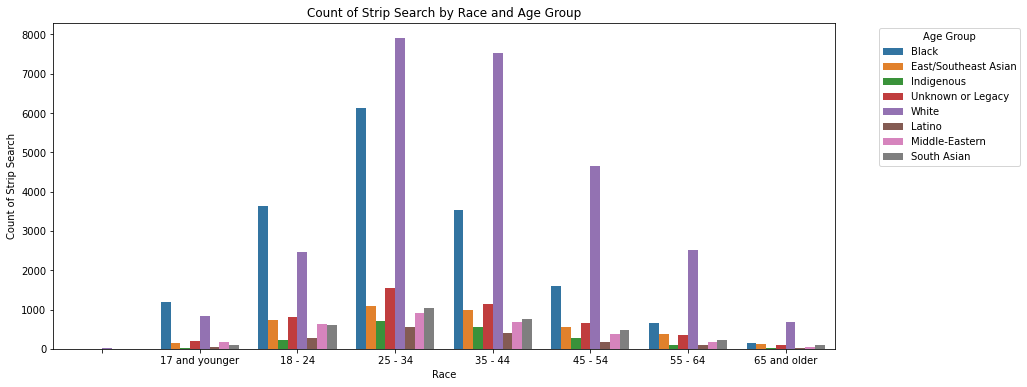

In [ ]:
group1 = arrest_data.groupby(['Age', 'Perceived_Race'])['StripSearch'].count().reset_index()
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='Age', y='StripSearch', hue='Perceived_Race', data=group1, ax=ax)
plt.xlabel('Race')
plt.ylabel('Count of Strip Search')
plt.title('Count of Strip Search by Race and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('figure8.pdf')
plt.show();

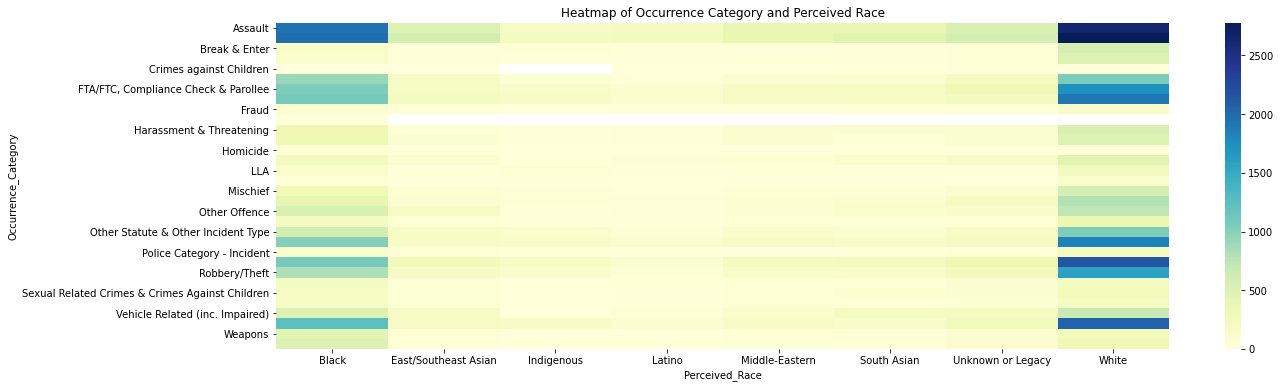

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
# Create a pivot table of the occurrence category and perceived race
pivot_table = pd.pivot_table(arrest_data, values='ObjectId', index='Occurrence_Category', columns='Perceived_Race', aggfunc='count')
# xCreate the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Occurrence Category and Perceived Race')
plt.savefig('figure9.pdf')
plt.show();

#Power analysis

In [ ]:
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


In [ ]:
effect_sizes = np.linspace(0.1, 1.0, num=50)  # Effect size
alpha = 0.05  # Significance level
power = 0.8  # efficacy
ratio = 1  # Sample ratio
nobs = 100  # 
smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, nobs1=nobs, ratio=ratio)

1.0

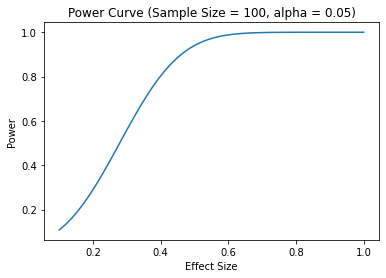

In [ ]:
# Set parameters
effect_sizes = np.linspace(0.1, 1.0, num=50)  # Effect size
alpha = 0.05  # Significance level
power = 0.8  # efficacy
ratio = 1  # Sample ratio
nobs = 100  # n

# Computational statistical efficacy
powers = []
for effect_size in effect_sizes:
    power = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, nobs1=nobs, ratio=ratio)
    powers.append(power)

# Power drawing
plt.plot(effect_sizes, powers)
plt.xlabel("Effect Size")
plt.ylabel("Power")
plt.title(f"Power Curve (Sample Size = {nobs}, alpha = {alpha})")
plt.show()

#T-tests

In [ ]:
#Whether the number of strip searches by men and women is significant？
group1=arrest_data[arrest_data['Sex']=='M']['StripSearch']
group2=arrest_data[arrest_data['Sex']=='F']['StripSearch']

group1_mean = np.mean(group1)
group1_sd = np.std(group1)
group1_size = len(group1)
group2_mean = np.mean(group2)
group2_sd = np.std(group2)
group2_size = len(group2)

t_statistic, p_value = ttest_ind(group1, group2)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 1: Mean = {}, SD = {}, Size = {}'.format(group1_mean, group1_sd, group1_size))
print('Group 2: Mean = {}, SD = {}, Size = {}'.format(group2_mean, group2_sd, group2_size))

T-statistic: 6.446590183840917
P-value: 1.1523178633860255e-10
Group 1: Mean = 0.12956055135544872, SD = 0.33581931881272087, Size = 50131
Group 2: Mean = 0.10778039744021556, SD = 0.31010285933519044, Size = 11876


In [ ]:
#Is there a significant difference in the mean value of number of strip search between White community and black community?
group3=arrest_data[arrest_data['Perceived_Race']=='White']['StripSearch']
group4=arrest_data[arrest_data['Perceived_Race']=='Black']['StripSearch']

group3_mean = np.mean(group3)
group3_sd = np.std(group3)
group3_size = len(group3)
group4_mean = np.mean(group4)
group4_sd = np.std(group4)
group4_size = len(group4)

t_statistic, p_value = ttest_ind(group3, group4)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 3: Mean = {}, SD = {}, Size = {}'.format(group3_mean, group3_sd, group3_size))
print('Group 4: Mean = {}, SD = {}, Size = {}'.format(group4_mean, group4_sd, group4_size))

T-statistic: -2.8900270963262384
P-value: 0.0038539930100923584
Group 3: Mean = 0.1339981185324553, SD = 0.340650293941219, Size = 26575
Group 4: Mean = 0.1438063597532036, SD = 0.35089327529569464, Size = 16856


In [ ]:
#Age and strip search times
group5=arrest_data[arrest_data['youth']=='Adult']['StripSearch']
group6=arrest_data[arrest_data['youth']=='Youth']['StripSearch']

group5_mean = np.mean(group5)
group5_sd = np.std(group5)
group5_size = len(group5)
group6_mean = np.mean(group6)
group6_sd = np.std(group6)
group6_size = len(group6)

t_statistic, p_value = ttest_ind(group5, group6)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 4: Mean = {}, SD = {}, Size = {}'.format(group5_mean, group5_sd, group5_size))
print('Group 5: Mean = {}, SD = {}, Size = {}'.format(group6_mean, group6_sd, group6_size))


T-statistic: 3.670495437191244
P-value: 0.00024228367944872597
Group 4: Mean = 0.12641429896298795, SD = 0.3323156992692329, Size = 59305
Group 5: Mean = 0.10254518627812616, SD = 0.30336392509542875, Size = 2711


In [ ]:
#Year of arrest and number of strip searches
time_StripSearch = arrest_data.groupby(['Arrest_Year','Arrest_Month'])['StripSearch'].sum().reset_index()
time_StripSearch = time_StripSearch.rename(columns={'StripSearch' : 'Time_StripSearch' })

#define year sample
arrests_2020 = time_StripSearch[time_StripSearch['Arrest_Year'] == 2020]['Time_StripSearch']
arrests_2021 = time_StripSearch[time_StripSearch['Arrest_Year'] == 2021]['Time_StripSearch']

#t test 
t_statistic, p_value = ttest_ind(arrests_2020, arrests_2021, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 3.161456364319633
p-value: 0.050060141193014475


In [ ]:
count = arrest_data.groupby("PersonID")["PersonID"].transform("count")
arrest_data["num_arrests"] = count

In [ ]:
grouped = arrest_data.groupby("youth")["num_arrests"]
youth_arrests = grouped.get_group("Youth").values
adult_arrests = grouped.get_group("Adult").values
# Whether there is a significant difference in mean numbers of crime committed between youth and adult
t_statistic, p_value = stats.ttest_ind(youth_arrests, adult_arrests)
# Print the results
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  -14.591022696277948
p-value:  3.8508249516847134e-48


In [ ]:
# Create a new column indicating whether each person is Male or Female
arrest_data.loc[arrest_data['Sex'] == 'M', 'Gender'] = 'Male'
arrest_data.loc[arrest_data['Sex'] == 'F', 'Gender'] = 'Female'
grouped_1 = arrest_data.groupby("Gender")["num_arrests"]
Male_arrests = grouped_1.get_group("Male").values
Female_arrests = grouped_1.get_group("Female").values
# Whether there is a significant difference in mean numbers of crime committed between male and female
t_statistic, p_value = stats.ttest_ind(Male_arrests, Female_arrests)
# Print the results
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  4.4720930386985644
p-value:  7.759499175303651e-06


In [ ]:
white=arrest_data[arrest_data['Perceived_Race']=='White']['num_arrests']
black=arrest_data[arrest_data['Perceived_Race']=='Black']['num_arrests']
white_arrests = white.values
black_arrests = black.values
t_statistic, p_value = stats.ttest_ind(white_arrests, black_arrests)
# Print the results
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  12.836943963215536
p-value:  1.1921956337625876e-37


In [ ]:
arrest_2020=arrest_data[arrest_data['Arrest_Year']==2020]['num_arrests']
arrest_2021=arrest_data[arrest_data['Arrest_Year']==2021]['num_arrests']
t_statistic, p_value = stats.ttest_ind(arrest_2020.values, arrest_2021.values)
# Print the results
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  -6.373937867488679
p-value:  1.8552481801510414e-10


#Chi-square test

In [ ]:
# Chi-square test for independence between strip searches and race
contingency_table = pd.crosstab(arrest_data['Perceived_Race'],arrest_data['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between Perceived_Race and strip searches.')
else:
    print('There is no significant association between Perceived_Race and strip searches.')

Chi-square statistic: 328.9831226135833
P-value: 3.869152263257977e-67
There is a significant association between Perceived_Race and strip searches.


In [ ]:
# Chi-square test for independence between strip searches and age
contingency_table = pd.crosstab(arrest_data['youth'],arrest_data['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between youth and strip searches.')
else:
    print('There is no significant association between youth and strip searches.')

Chi-square statistic: 13.253245742380752
P-value: 0.0002721083104375059
There is a significant association between youth and strip searches.


In [ ]:
# Chi-square test for independence between strip searches and sex
contingency_table = pd.crosstab(arrest_data['Sex'],arrest_data['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between Sex and strip searches.')
else:
    print('There is no significant association between Sex and strip searches.')

Chi-square statistic: 42.82745583444972
P-value: 5.013443541959564e-10
There is a significant association between Sex and strip searches.


In [ ]:
# Chi-square test for independence between strip searches and year
contingency_table = pd.crosstab(arrest_data['Arrest_Year'],arrest_data['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between Arrest_Year and strip searches.')
else:
    print('There is no significant association between Arrest_Year and strip searches.')

Chi-square statistic: 5677.97175710852
P-value: 0.0
There is a significant association between Arrest_Year and strip searches.


# Analysis of variance

In [ ]:
#1-way ANOVA
# Create a new variable that contain race and police encounters
whitep = arrest_data[arrest_data['Perceived_Race']=='White']['StripSearch']
blackp = arrest_data[arrest_data['Perceived_Race']=='Black']['StripSearch']
indigp = arrest_data[arrest_data['Perceived_Race']== 'Indigenous']['StripSearch']
SEAp = arrest_data[arrest_data['Perceived_Race']== 'East/Southeast Asian']['StripSearch']
Latinop = arrest_data[arrest_data['Perceived_Race']== 'Latino']['StripSearch']
MidEp = arrest_data[arrest_data['Perceived_Race']== 'Middle-Eastern']['StripSearch']
SAp = arrest_data[arrest_data['Perceived_Race']== 'South Asian']['StripSearch']
# Do Anova
statistic, pvalue = f_oneway(whitep, blackp, Latinop)
# Perform one-way ANOVA on the white black and lation data to prove this works
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')
# 1 way ANOVAs indig SEA and MidEast
# Do Anova
statistic2, pvalue2 = f_oneway(indigp, SEAp, MidEp)
print(f'One-way ANOVA: s = {statistic2}, p = {pvalue2}')
statistic3, pvalue3 = f_oneway(whitep, Latinop, SAp)
print(f'One-way ANOVA: s = {statistic3}, p = {pvalue3}')

One-way ANOVA: s = 23.755534633648615, p = 4.8813834981608474e-11
One-way ANOVA: s = 57.539339045137794, p = 1.4847142771028573e-25
One-way ANOVA: s = 58.01250190468715, p = 7.109345765418521e-26


In [ ]:
group1=arrest_data[arrest_data['Sex']=='M']['StripSearch']
group2=arrest_data[arrest_data['Sex']=='F']['StripSearch']
statistic, pvalue = f_oneway(group1, group2)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 41.55852499839409, p = 1.1523178633895922e-10


In [ ]:
group5=arrest_data[arrest_data['youth']=='Adult']['StripSearch']
group6=arrest_data[arrest_data['youth']=='Youth']['StripSearch']
statistic, pvalue = f_oneway(group5, group6)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 13.472536754441743, p = 0.00024228367943354386


In [ ]:
groupa=arrest_data[arrest_data['youth']=='Adult']['num_arrests']
groupb=arrest_data[arrest_data['youth']=='Youth']['num_arrests']
statistic, pvalue = f_oneway(groupa, groupb)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 212.89794332329828, p = 3.850824951462144e-48


In [ ]:
groupa=arrest_data[arrest_data['Sex']=='M']['num_arrests']
groupb=arrest_data[arrest_data['Sex']=='F']['num_arrests']
statistic, pvalue = f_oneway(groupa, groupb)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 19.999616146776184, p = 7.759499175291217e-06


In [ ]:
white=arrest_data[arrest_data['Perceived_Race']=='White']['num_arrests']
black=arrest_data[arrest_data['Perceived_Race']=='Black']['num_arrests']
statistic, pvalue = f_oneway(white, black)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 164.7871303147358, p = 1.1921956337483094e-37


In [ ]:
#2-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.special import factorial
#import statsmodels.formula.api as smf

# Fit the two-way ANOVA model with 'Race', 'youth', and their interaction as the predictors

model = ols('StripSearch ~ C(Perceived_Race) + C(youth) + C(Perceived_Race):C(youth)', data=arrest_data).fit()
# Print the ANOVA table for the fitted model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq       df          F        PR(>F)
C(Perceived_Race)             36.376257      7.0  47.668208  5.916546e-68
C(youth)                       1.780478      1.0  16.332230  5.321629e-05
C(Perceived_Race):C(youth)     2.914035      7.0   3.818613  3.733767e-04
Residual                    6758.679027  61997.0        NaN           NaN


In [ ]:
#2-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.special import factorial

# Fit the two-way ANOVA model with 'Race', 'sex', and their interaction as the predictors

#model = ols('StripSearch ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=arrest_data).fit()
model = ols('StripSearch ~ Perceived_Race + Sex + Perceived_Race:Sex', data=arrest_data).fit()
#not sure what should be wriiten at xxx

# Print the ANOVA table for the fitted model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                         sum_sq       df          F        PR(>F)
Perceived_Race        28.378434      7.0  37.239834  4.917070e-24
Sex                    6.480971      2.0  29.766476  1.198911e-13
Perceived_Race:Sex    11.204748     14.0   7.351761  9.400322e-12
Residual            6748.889298  61994.0        NaN           NaN


In [ ]:
#2-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.special import factorial

model = ols('num_arrests ~ C(Perceived_Race) + C(youth) + C(Perceived_Race):C(youth)', data=arrest_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                  sum_sq       df           F        PR(>F)
C(Perceived_Race)           5.304204e+04      7.0  259.086519  0.000000e+00
C(youth)                    5.385880e+03      1.0  184.153208  6.895681e-42
C(Perceived_Race):C(youth)  2.134663e+03      7.0   10.426871  3.739857e-13
Residual                    1.813210e+06  61997.0         NaN           NaN


In [ ]:
#2-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.special import factorial
model = ols('num_arrests ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=arrest_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                sum_sq       df           F         PR(>F)
C(Perceived_Race)         8.274037e+04      7.0  403.765120  8.850064e-260
C(Sex)                    2.115680e+03      2.0   36.135106   2.069489e-16
C(Perceived_Race):C(Sex)  5.273246e+03     14.0   12.866469   9.273274e-23
Residual                  1.814848e+06  61994.0         NaN            NaN


In [ ]:
# Build ANCOVA model
model = sm.formula.ols('StripSearch ~ Perceived_Race + Sex', data=arrest_data)
# Do the fitting
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     43.48
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.78e-78
Time:                        15:13:10   Log-Likelihood:                -19258.
No. Observations:               62013   AIC:                         3.854e+04
Df Residuals:                   62003   BIC:                         3.863e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
# Build ANCOVA model
model = sm.formula.ols('StripSearch ~ Perceived_Race + youth', data=arrest_data)
# Do the fitting
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           6.00e-70
Time:                        15:13:11   Log-Likelihood:                -19280.
No. Observations:               62013   AIC:                         3.858e+04
Df Residuals:                   62004   BIC:                         3.866e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
# Build ANCOVA model
model = sm.formula.ols('num_arrests ~ Perceived_Race + youth', data=arrest_data)
# Do the fitting
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            num_arrests   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     253.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:13:11   Log-Likelihood:            -1.9269e+05
No. Observations:               62013   AIC:                         3.854e+05
Df Residuals:                   62004   BIC:                         3.855e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
# Build ANCOVA model
model = sm.formula.ols('num_arrests ~ Perceived_Race + Sex', data=arrest_data)
# Do the fitting
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            num_arrests   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     212.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:13:12   Log-Likelihood:            -1.9275e+05
No. Observations:               62013   AIC:                         3.855e+05
Df Residuals:                   62003   BIC:                         3.856e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

7.Tukey's HSD post-hoc test

In [ ]:
# Conduct Tukey's HSD post-hoc test
tk_model1 = mc.pairwise_tukeyhsd(endog=arrest_data['StripSearch'], groups=arrest_data['Sex'] + arrest_data['youth'],
                                     alpha=0.05)
print(tk_model1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
FAdult FYouth  -0.0641    0.0 -0.1004 -0.0279   True
FAdult MAdult   0.0186    0.0  0.0092  0.0281   True
FAdult MYouth   0.0089 0.7942 -0.0127  0.0306  False
FAdult UAdult  -0.1113 0.8515 -0.4124  0.1897  False
FYouth MAdult   0.0828    0.0  0.0473  0.1182   True
FYouth MYouth   0.0731    0.0  0.0326  0.1135   True
FYouth UAdult  -0.0472 0.9932 -0.3502  0.2558  False
MAdult MYouth  -0.0097 0.6903   -0.03  0.0106  False
MAdult UAdult    -0.13 0.7641 -0.4309   0.171  False
MYouth UAdult  -0.1203  0.813 -0.4219  0.1814  False
----------------------------------------------------


In [ ]:
# Conduct Tukey's HSD post-hoc test
tk_model1 = mc.pairwise_tukeyhsd(endog=arrest_data['num_arrests'], groups=arrest_data['youth'] + arrest_data['Sex'],
                                     alpha=0.05)
print(tk_model1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
AdultF AdultM   0.2582 0.0001  0.1013  0.4152   True
AdultF AdultU  -0.4666 0.9991 -5.4592  4.5261  False
AdultF YouthF  -1.1256    0.0 -1.7266 -0.5247   True
AdultF YouthM    -1.44    0.0 -1.7993 -1.0807   True
AdultM AdultU  -0.7248 0.9948 -5.7159  4.2663  False
AdultM YouthF  -1.3839    0.0  -1.972 -0.7958   True
AdultM YouthM  -1.6982    0.0 -2.0356 -1.3609   True
AdultU YouthF  -0.6591 0.9965 -5.6838  4.3657  False
AdultU YouthM  -0.9734 0.9842 -5.9749  4.0282  False
YouthF YouthM  -0.3143  0.705 -0.9854  0.3567  False
----------------------------------------------------


In [ ]:
# Conduct Tukey's HSD post-hoc test
arrest_data['Perceived_Race']=arrest_data['Perceived_Race'].fillna(arrest_data['Perceived_Race'].mode()[0])
tk_model1 = mc.pairwise_tukeyhsd(endog=arrest_data['num_arrests'], groups=arrest_data['Perceived_Race'] + arrest_data['Sex'],
                                     alpha=0.05)
print(tk_model1.summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------
               BlackF                BlackM   0.4013 0.0365   0.0105   0.792   True
               BlackF East/Southeast AsianF  -1.3306    0.0  -2.1598 -0.5015   True
               BlackF East/Southeast AsianM   -0.738    0.0  -1.2224 -0.2535   True
               BlackF           IndigenousF   1.9959    0.0   1.1482  2.8436   True
               BlackF           IndigenousM   5.2257    0.0   4.5833  5.8681   True
               BlackF               LatinoF    -1.13 0.2044  -2.4451  0.1851  False
               BlackF               LatinoM   -0.194 0.9999  -0.8209  0.4328  False
               BlackF               LatinoU  -2.7672    1.0 -21.8018 16.2675  False
               BlackF       Middle-EasternF  -0.1497    1.0  -1.2532  0.9538

Interaction diagram

In [ ]:
df_ArSt_sgs = arrest_data[['Arrest_Year', 'Arrest_Month', 'EventID','Sex','Perceived_Race','StripSearch']]
df_ArSt_sgs = df_ArSt_sgs.loc[df_ArSt_sgs["Sex"] != "U"]
df_ArSt_sgs = df_ArSt_sgs.loc[df_ArSt_sgs["Perceived_Race"] != "Unknown or Legacy"]
#Merge the Asian groups
df_ArSt_sgs['Perceived_Race'] = df_ArSt_sgs['Perceived_Race'].replace({'South Asian': 'Asian'})
df_ArSt_sgs['Perceived_Race'] = df_ArSt_sgs['Perceived_Race'].replace({'East/Southeast Asian': 'Asian'})
ss = df_ArSt_sgs.loc[df_ArSt_sgs['StripSearch'] == 1] 
ss = ss.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex'])['StripSearch'].sum().reset_index()

df_ssn = df_ArSt_sgs.loc[df_ArSt_sgs['StripSearch'] == 0] 
ssn = df_ssn.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex'])['StripSearch'].count().reset_index()
sgs = pd.merge(ss, ssn, on=['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex'])
sgs['portion'] = round(sgs['StripSearch_x']/sgs['StripSearch_y'],2)
sex = sgs['Sex'].astype("category")
portion = sgs['portion'].values

<Figure size 1080x576 with 0 Axes>

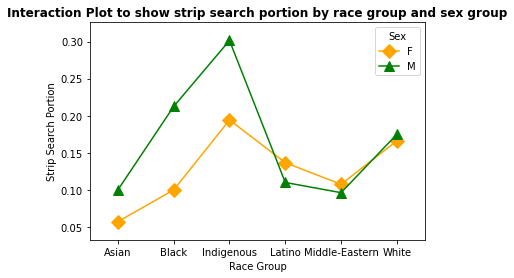

In [ ]:
plt.figure(figsize=(15,8))
sgs_interaction = interaction_plot(sgs['Perceived_Race'], sex, portion, colors=['orange','green'], markers=['D','^'], ms=10)
plt.ylabel('Strip Search Portion')
plt.xlabel('Race Group')
plt.title('Interaction Plot to show strip search portion by race group and sex group', fontweight='bold')
plt.savefig('figure10.pdf')
plt.show();

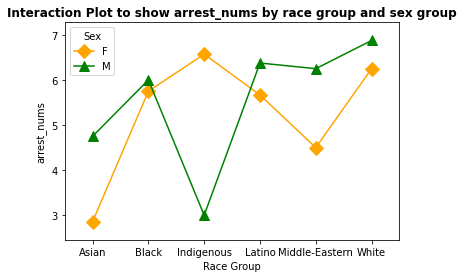

In [ ]:
num_arrest = arrest_data['num_arrests']
sgs_interaction = interaction_plot(sgs['Perceived_Race'], sex, num_arrest, colors=['orange','green'], markers=['D','^'], ms=10)

plt.ylabel('arrest_nums')
plt.xlabel('Race Group')
plt.title('Interaction Plot to show arrest_nums by race group and sex group', fontweight='bold')
plt.savefig('figure11.pdf')
plt.show();

# Logistic regression

In [ ]:
lr_data = arrest_data.copy()
mapping = {'Youth': 0, 'Adult': 1}
lr_data['youth'] = lr_data['youth'].map(mapping)
mapping1 = {'F': 0, 'M': 1,'U': 2}
lr_data['Sex'] = lr_data['Sex'].map(mapping1)
mapping2 = {'White': 0, 'Black': 1,'Unknown or Legacy': 2,'East/Southeast Asian' : 3,'South Asian': 4,'Middle-Eastern':5,'Indigenous':6,'Latino':7}
lr_data['Perceived_Race'] = lr_data['Perceived_Race'].map(mapping2)

X = lr_data[['Sex','Perceived_Race','num_arrests']]
y = lr_data['StripSearch']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print('Number of training sets',len(X_train))
print('Number of testing sets',len(X_test))
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(pd.DataFrame(y_pred).value_counts())
print('Test set accuracy：',round(metrics.accuracy_score(y_test,y_pred)*100,2),'%')

Number of training sets 49612
Number of testing sets 12404
0    12389
1       15
dtype: int64
Test set accuracy： 87.62 %


In [ ]:
b=model.coef_
a=model.intercept_
print(b)
print(a)

[[ 0.17298945 -0.07858211  0.0514066 ]]
[-2.22609043]


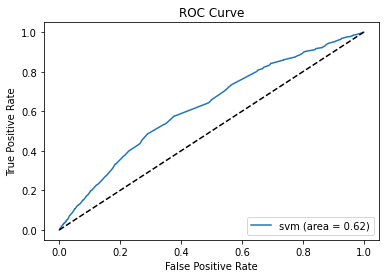

In [ ]:
model_fpr, model_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
model_roc_auc = auc(model_fpr, model_tpr)
plt.plot(model_fpr, model_tpr, label='svm (area = %0.2f)' % model_roc_auc)

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

In [ ]:
X = sm.add_constant(X) 
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            StripSearch   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     386.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.03e-248
Time:                        16:28:03   Log-Likelihood:                -18882.
No. Observations:               62016   AIC:                         3.777e+04
Df Residuals:                   62012   BIC:                         3.781e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0869      0.003     26.300      0.000       0.080       0.093
Sex                0.0211      0.003      6.295      0.000       0.015       0.028
Perceived_Race    -0.0074      0.001    -10.474      0.000      -0.009      -0.006
num_arrests        0.0075      0.000     31.289      0.000       0.007       0.008
==============================================================================
Omnibus:                    24749.255   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73863.234
Skew:                           2.200   Prob(JB):                         0.00
Kurtosis:                       6.036   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""